# Hipervolume

O **Hipervolume (HV)** quantifica o volume $V$ do espaço no objetivo $\mathbb{R}^M$ que é dominado por um conjunto de soluções **não dominadas** $\text{ND} = \{ \mathbf{f}_1, \mathbf{f}_2, \dots, \mathbf{f}_n \}$, em relação a um ponto de referência $\mathbf{r} = (r_1, r_2, \dots, r_M)$. Esse ponto $\mathbf{r}$ é escolhido de forma que todas as soluções estejam dentro do espaço $[f_i, r_i]$ para cada $i$.

Formalmente, o hipervolume é definido como:

$$
HV(\text{ND}, \mathbf{r}) = \text{Vol} \left( \bigcup_{\mathbf{f} \in \text{ND}} \prod_{i=1}^M [f_i, r_i] \right),
$$

onde:
- $\mathbf{f} = (f_1, f_2, \dots, f_M)$ representa um vetor de valores das funções-objetivo para uma solução $\mathbf{f} \in \text{ND}$,
- $\prod_{i=1}^M [f_i, r_i]$ representa a região no espaço objetivo dominada por $\mathbf{f}$,
- $\bigcup_{\mathbf{f} \in \text{ND}} \prod_{i=1}^M [f_i, r_i]$ é a união das regiões dominadas por todas as soluções $\mathbf{f}$ em $\text{ND}$,
- $\text{Vol}(\cdot)$ denota a medida do volume $M$-dimensional da região dominada.


### Conceitos-chave
1. **Dominância Pareto**:
   - Uma solução $\mathbf{f}_1$ domina $\mathbf{f}_2$ (escrito $\mathbf{f}_1 \prec \mathbf{f}_2$) se:
     $$
     f_{1,i} \leq f_{2,i}, \, \forall i = 1, \dots, M \quad \text{e} \quad \exists j \text{ tal que } f_{1,j} < f_{2,j}.
     $$
   - O conjunto $\text{ND}$ contém apenas soluções que não são dominadas por nenhuma outra.

2. **Construção do Volume**:
   - Cada solução $\mathbf{f} \in \text{ND}$ gera um retângulo ou hiper-retângulo $[f_1, r_1] \times [f_2, r_2] \times \cdots \times [f_M, r_M]$ no espaço objetivo.
   - O HV é a união de todos esses hiper-retângulos, descontando interseções para evitar contagens duplicadas.

### Exemplo para $M = 2$: Caso bidimensional
Para dois objetivos $f_1$ e $f_2$, suponha um conjunto de soluções $\text{ND} = \{(0.2, 0.8), (0.5, 0.6), (0.8, 0.4)\}$ e um ponto de referência $\mathbf{r} = (1, 1)$.

O hipervolume é dado por:

$$
HV = \text{Área} \left( \bigcup_{(f_1, f_2) \in \text{ND}} [f_1, 1] \times [f_2, 1] \right).
$$

Nesse caso, a área dominada é a união de três retângulos:
1. De $(0.2, 0.8)$ até $(1, 1)$,
2. De $(0.5, 0.6)$ até $(1, 1)$,
3. De $(0.8, 0.4)$ até $(1, 1)$,
descontando sobreposições.

### Características
- O cálculo exato do HV é computacionalmente caro: $O(n^{M-1} \log n)$, onde $n = |\text{ND}|$ e $M$ é o número de objetivos.
- O valor do HV é maior quanto mais "próximas" as soluções estiverem do ideal Pareto, cobrindo mais espaço dominado no objetivo.

### Função para Plotar Hipervolume no Plano

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Função para desenhar os retângulos dominados por cada ponto
def plot_hypervolume(solutions, reference_point):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Configurações do gráfico
    ax.set_xlim(0, 1.1)
    ax.set_ylim(0, 1.1)
    ax.set_xlabel("f1 (Minimizar)")
    ax.set_ylabel("f2 (Minimizar)")
    ax.set_title("Hipervolume em 2D")
    
    total_area = 0  # Variável para acumular a área dominada
    
    # Plotar cada solução e seu retângulo dominado
    for sol in solutions:
        # Retângulo dominado por este ponto
        width = reference_point[0] - sol[0]
        height = reference_point[1] - sol[1]
        total_area += width * height  # Adiciona a área deste retângulo

        # Desenhar o retângulo em tracejado
        rect = patches.Rectangle(
            sol, width, height, linewidth=1.5, edgecolor="gray", linestyle="--", facecolor="none"
        )
        ax.add_patch(rect)
        # Plotar o ponto da solução
        ax.plot(sol[0], sol[1], 'ro')  # Pontos em vermelho
    
    # Adiciona o ponto de referência no gráfico
    ax.plot(reference_point[0], reference_point[1], 'bo', label="Ponto de Referência (1,1)")

    # Informações adicionais no gráfico
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_aspect('equal', adjustable='box')
    
    plt.show()
    return total_area

### Função para plotar hipervolume no Plano com triângulos

In [2]:
import matplotlib.pyplot as plt

def triangle_area(p1, p2, p3):
    # Descompactando as coordenadas dos pontos
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3

    # Calculando a área
    area = abs(x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2)) / 2
    return area

# Função para calcular e plotar o hipervolume em 2D com triângulos
def plot_hypervolume_2d_with_triangles(points, reference_point):
    # Ordenar os pontos de cima para baixo (menor f2 primeiro)
    points = sorted(points, key=lambda x: x[1], reverse=True)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(0, 1.1)
    ax.set_ylim(0, 1.1)
    ax.set_xlabel("f1 (Minimizar)")
    ax.set_ylabel("f2 (Minimizar)")
    ax.set_title("Hipervolume em 2D com Triângulos")
    
    total_area = 0  # Variável para acumular a área

    # Iterar sobre os pontos para criar os triângulos
    for i in range(len(points) - 1):
        p = points[i]
        n_p = points[i + 1]  # Próximo ponto na ordem
        
        # Contribuição ao hipervolume
        total_area += triangle_area(p, n_p, reference_point)

        # Desenhar os triângulos em pontilhado
        triangle = np.array([p, n_p, reference_point, p])  # Fechar o triângulo
        ax.plot(triangle[:, 0], triangle[:, 1], linestyle='dotted', color='gray')
        
        # Plotar os pontos
        ax.scatter(*p, color='red')  # Pontos em vermelho
        ax.scatter(*n_p, color='red')  # Próximo ponto em vermelho

    # Adicionar o ponto de referência
    ax.scatter(*reference_point, color='blue', label="Ponto de Referência (R)")
    ax.legend()
    plt.show()
    return total_area

### Exemplos hipervolume no plano

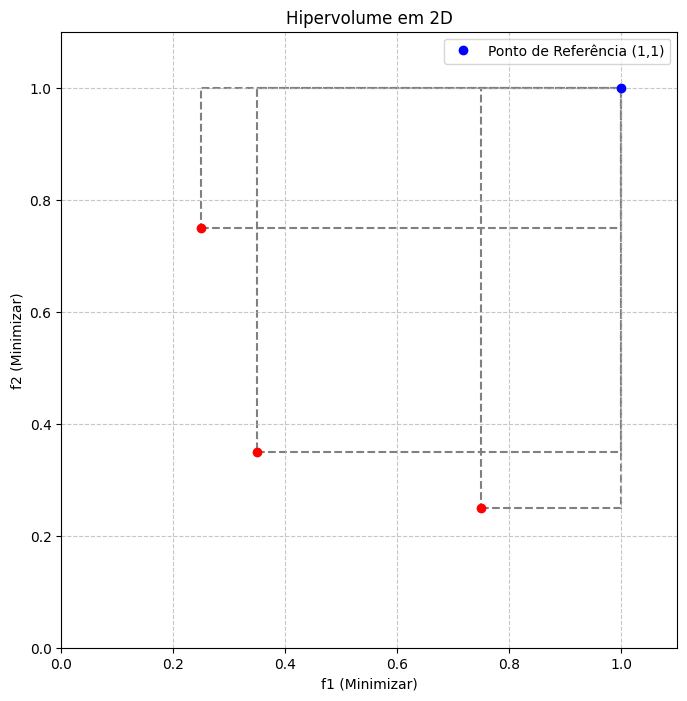

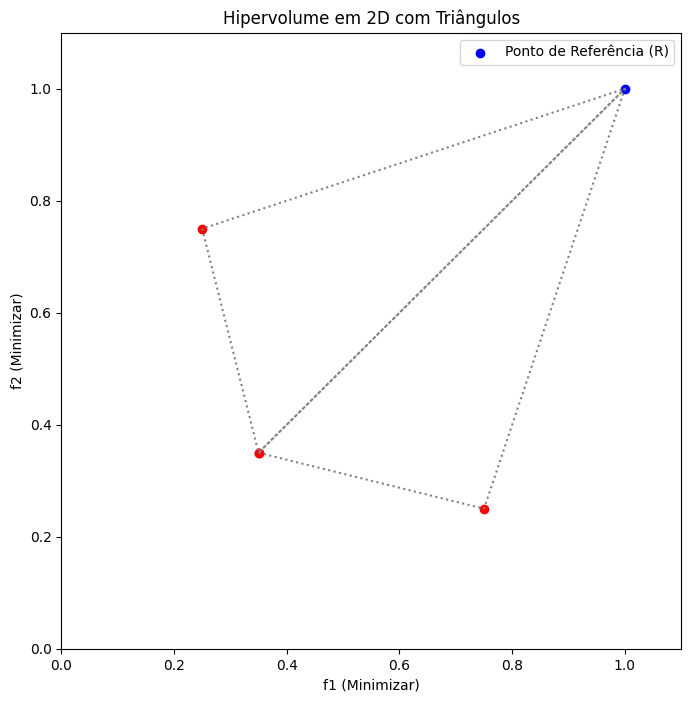

results:
	dummy hp:0.7975000000000001
	triangle:0.32500000000000007
	hv:0.47250000000000003


In [3]:
from deap.tools._hypervolume import hv

# Conjunto de soluções não dominadas
solutions_2d = np.array([
    [0.75, 0.25],
    [0.35, 0.35],
    [0.25, 0.75]
])

# Ponto de referência
reference_point_2d = [1.0, 1.0]
# Plot e cálculo do hipervolume
hypervolume_area = plot_hypervolume(solutions_2d, reference_point_2d)

# Cálculo e plotagem do hipervolume com triângulos
corrected_hypervolume_with_plot = plot_hypervolume_2d_with_triangles(solutions_2d, reference_point_2d)

# Calcular o hipervolume
corrected_hypervolume_deap_2d = hv.hypervolume(solutions_2d, reference_point_2d)

print(f"results:\n\tdummy hp:{hypervolume_area}\n\ttriangle:{corrected_hypervolume_with_plot}\n\thv:{corrected_hypervolume_deap_2d}")

### Função para plotar hipervolume no espaço tridimensional

In [4]:
# Reimportando bibliotecas necessárias após o reset do ambiente
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Função para calcular e plotar o hipervolume em 3D
def plot_hypervolume_3d(solutions, reference_point):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Configurações do gráfico
    ax.set_xlim(0, 1.1)
    ax.set_ylim(0, 1.1)
    ax.set_zlim(0, 1.1)
    ax.set_xlabel("f1 (Minimizar)")
    ax.set_ylabel("f2 (Minimizar)")
    ax.set_zlabel("f3 (Minimizar)")
    ax.set_title("Hipervolume em 3D")

    total_volume = 0  # Variável para acumular o volume dominado
    
    # Plotar cada solução e o paralelepípedo dominado
    for sol in solutions:
        # Dimensões do paralelepípedo dominado
        width = reference_point[0] - sol[0]
        height = reference_point[1] - sol[1]
        depth = reference_point[2] - sol[2]
        total_volume += width * height * depth  # Soma o volume deste paralelepípedo
        
        # Criação das faces do paralelepípedo
        vertices = [
            [sol, [sol[0] + width, sol[1], sol[2]], [sol[0] + width, sol[1] + height, sol[2]], [sol[0], sol[1] + height, sol[2]]],
            [sol, [sol[0], sol[1], sol[2] + depth], [sol[0], sol[1] + height, sol[2] + depth], [sol[0], sol[1] + height, sol[2]]],
            [[sol[0], sol[1] + height, sol[2]], [sol[0], sol[1] + height, sol[2] + depth], [sol[0] + width, sol[1] + height, sol[2] + depth], [sol[0] + width, sol[1] + height, sol[2]]],
            [[sol[0] + width, sol[1], sol[2]], [sol[0] + width, sol[1], sol[2] + depth], [sol[0] + width, sol[1] + height, sol[2] + depth], [sol[0] + width, sol[1] + height, sol[2]]],
            [sol, [sol[0] + width, sol[1], sol[2]], [sol[0] + width, sol[1], sol[2] + depth], [sol[0], sol[1], sol[2] + depth]],
            [[sol[0], sol[1], sol[2] + depth], [sol[0] + width, sol[1], sol[2] + depth], [sol[0] + width, sol[1] + height, sol[2] + depth], [sol[0], sol[1] + height, sol[2] + depth]]
        ]
        
        # Adicionar o paralelepípedo ao gráfico
        ax.add_collection3d(Poly3DCollection(vertices, alpha=0.3, edgecolor='gray', linewidths=0.5))
        
        # Plotar o ponto da solução
        ax.scatter(sol[0], sol[1], sol[2], color='r', s=50)  # Pontos em vermelho
    
    # Adicionar o ponto de referência
    ax.scatter(reference_point[0], reference_point[1], reference_point[2], color='b', label="Ponto de Referência (1,1,1)", s=50)
    
    # Informações adicionais no gráfico
    ax.legend()
    plt.show()
    return total_volume

### Exemplo hipervolume no espaço tridimensional

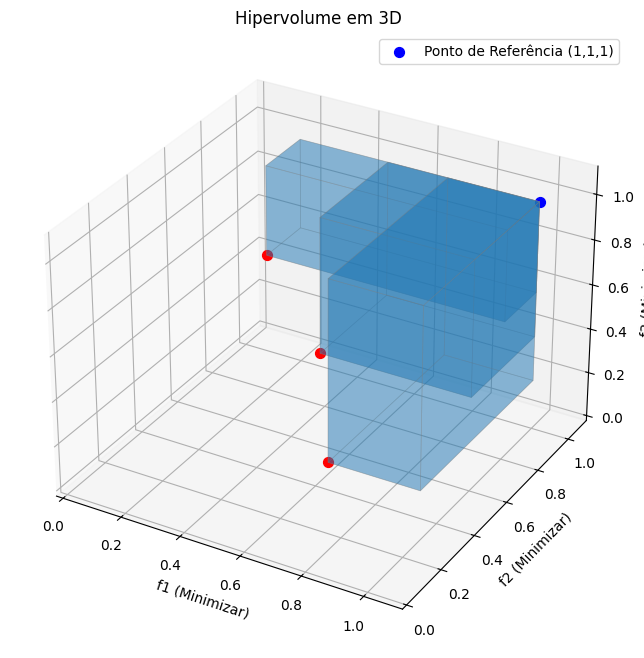

results:
	dummy: 0.35200000000000004
	real: 0.24000000000000002


In [5]:
from deap.tools._hypervolume import hv

# Conjunto de soluções não dominadas em 3D
solutions_3d = np.array([
    [0.2, 0.8, 0.6],
    [0.5, 0.6, 0.4],
    [0.7, 0.3, 0.2]
])

# Ponto de referência em 3D
reference_point_3d = [1.0, 1.0, 1.0]

# Calcular o hipervolume
corrected_hypervolume_deap_3d = hv.hypervolume(solutions_3d, reference_point_3d)

# Plot e cálculo do hipervolume
hypervolume_volume_3d = plot_hypervolume_3d(solutions_3d, reference_point_3d)

print(f"results:\n\tdummy: {hypervolume_volume_3d}\n\treal: {corrected_hypervolume_deap_3d}")